In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px
sns.set()

In [2]:
data = pd.read_parquet('../Data/yellow_tripdata_2018-01.parquet')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN


## ANALIZAMOS LOS DATOS

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [4]:
data.isna().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     8760675
airport_fee              8760675
dtype: int64

In [5]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,12.0,12.0
mean,1.560978e+00,1.606807e+00,2.804022e+00,1.039545e+00,1.644579e+02,1.627270e+02,1.310613e+00,1.224443e+01,3.246882e-01,4.975066e-01,1.818759e+00,3.026157e-01,2.996307e-01,1.549109e+01,2.5,0.0
std,4.962678e-01,1.258420e+00,6.412050e+01,4.450619e-01,6.635990e+01,7.031145e+01,4.817808e-01,1.168321e+01,4.502555e-01,4.333281e-02,2.486375e+00,1.738184e+00,1.442748e-02,1.419546e+01,0.0,0.0
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02,2.5,0.0
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,2.5,0.0
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.5,0.0
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01,2.5,0.0
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03,2.5,0.0


In [6]:
def contar_valores(columna):
    a=data[columna].unique()
    for n,i in enumerate(a):
        data[columna][data[columna]==a[n]].count()
        print(columna, i ,data[columna][data[columna]==a[n]].count())

contar_valores("VendorID")

VendorID 1 3846134
VendorID 2 4914553


In [7]:
contar_valores("VendorID")

VendorID 1 3846134
VendorID 2 4914553


In [8]:
contar_valores("passenger_count")

passenger_count 1 6249564
passenger_count 2 1271678
passenger_count 3 351928
passenger_count 5 414473
passenger_count 4 163572
passenger_count 6 250115
passenger_count 0 59269
passenger_count 7 39
passenger_count 8 24
passenger_count 9 25


In [9]:
contar_valores("RatecodeID")

RatecodeID 1 8533295
RatecodeID 2 179273
RatecodeID 5 27735
RatecodeID 4 5080
RatecodeID 3 15129
RatecodeID 6 69
RatecodeID 99 106


In [10]:
contar_valores("store_and_fwd_flag")

store_and_fwd_flag N 8729886
store_and_fwd_flag Y 30801


In [11]:
contar_valores("DOLocationID")

DOLocationID 24 28756
DOLocationID 140 165473
DOLocationID 141 218335
DOLocationID 257 4209
DOLocationID 239 222967
DOLocationID 143 118340
DOLocationID 238 191254
DOLocationID 170 279155
DOLocationID 229 161188
DOLocationID 113 124474
DOLocationID 224 37930
DOLocationID 79 202942
DOLocationID 100 134890
DOLocationID 189 8690
DOLocationID 236 360459
DOLocationID 162 267091
DOLocationID 61 13397
DOLocationID 75 106024
DOLocationID 233 124465
DOLocationID 125 43995
DOLocationID 146 10137
DOLocationID 234 245764
DOLocationID 263 173597
DOLocationID 237 320277
DOLocationID 166 65374
DOLocationID 249 144374
DOLocationID 151 73723
DOLocationID 231 141564
DOLocationID 116 23338
DOLocationID 145 25513
DOLocationID 82 7700
DOLocationID 164 181006
DOLocationID 68 194216
DOLocationID 161 337453
DOLocationID 48 234355
DOLocationID 90 133698
DOLocationID 13 76767
DOLocationID 148 90336
DOLocationID 88 33094
DOLocationID 87 67871
DOLocationID 213 1265
DOLocationID 264 141297
DOLocationID 74 65839
DO

In [12]:
contar_valores("payment_type")

payment_type 2 2599215
payment_type 1 6106416
payment_type 4 11852
payment_type 3 43204


In [13]:
contar_valores("congestion_surcharge")

congestion_surcharge nan 0
congestion_surcharge 2.5 12


In [14]:
contar_valores("airport_fee")

airport_fee nan 0
airport_fee 0.0 12


In [15]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN


In [16]:
data["Tiempo_Viaje"]=data["tpep_dropoff_datetime"]-data["tpep_pickup_datetime"]
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,NaN,0 days 00:03:18
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,NaN,NaN,0 days 00:18:10
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN,NaN,0 days 00:05:55
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,NaN,NaN,0 days 00:32:29
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,NaN,NaN,0 days 00:17:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,NaN,NaN,0 days 00:12:45
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,NaN,NaN,0 days 00:03:06
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,NaN,NaN,0 days 00:09:09
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,NaN,NaN,0 days 00:00:48


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        int64          
 4   trip_distance          float64        
 5   RatecodeID             int64          
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  ai

### Valores extraños

<AxesSubplot:>

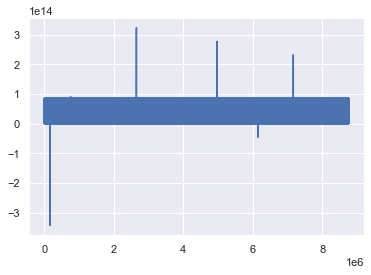

In [18]:
data["Tiempo_Viaje"].plot()

In [19]:
data[data["Tiempo_Viaje"]<timedelta(0)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
158888,1,2018-01-01 15:15:13,2017-12-28 16:03:38,1,3.3,1,N,209,137,1,13.0,0.5,0.5,2.85,0.00,0.3,17.15,NaN,NaN,-4 days +00:48:25
6146145,1,2018-01-23 13:12:19,2018-01-23 00:28:25,2,20.9,2,N,132,244,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,NaN,NaN,-1 days +11:16:06


In [20]:
data[data["fare_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
58,2,2018-01-01 01:02:39,2018-01-01 01:04:02,2,0.09,1,N,87,87,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:23
840,2,2018-01-01 00:38:19,2018-01-01 00:55:57,1,0.41,1,N,68,68,4,-11.0,-0.5,-0.5,0.0,0.0,-0.3,-12.3,NaN,NaN,0 days 00:17:38
3862,2,2018-01-01 00:46:31,2018-01-01 00:46:34,1,0.00,5,N,264,238,4,-13.8,0.0,0.0,0.0,0.0,-0.3,-14.1,NaN,NaN,0 days 00:00:03
4084,2,2018-01-01 00:47:40,2018-01-01 00:49:06,1,0.13,1,N,137,137,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:26
4242,2,2018-01-01 00:11:10,2018-01-01 00:15:14,1,0.16,1,N,137,170,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:04:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754678,2,2018-01-31 23:21:05,2018-01-31 23:24:44,1,0.69,1,N,164,234,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:03:39
8754757,2,2018-01-31 23:26:11,2018-01-31 23:26:46,2,0.03,1,N,68,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:35
8755958,2,2018-01-31 23:21:56,2018-01-31 23:21:59,1,0.00,1,N,264,112,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:03
8756003,2,2018-01-31 23:56:06,2018-01-31 23:57:06,2,0.12,1,N,246,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:01:00


In [21]:
data[data["tip_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
118030,2,2018-01-01 12:23:32,2018-01-01 12:27:08,1,0.48,1,N,50,246,3,-4.5,0.0,-0.5,-1.00,0.0,-0.3,-6.30,NaN,NaN,0 days 00:03:36
259470,2,2018-01-02 07:25:06,2018-01-02 07:25:21,1,0.00,1,N,230,230,3,-2.5,0.0,-0.5,-0.50,0.0,-0.3,-3.80,NaN,NaN,0 days 00:00:15
531790,2,2018-01-03 09:39:12,2018-01-03 09:39:46,2,0.02,1,N,50,50,3,-2.5,0.0,-0.5,-0.50,0.0,-0.3,-5.75,NaN,NaN,0 days 00:00:34
759165,2,2018-01-04 06:49:40,2018-01-04 06:50:05,3,0.00,1,N,68,68,4,-2.5,0.0,-0.5,-0.66,0.0,-0.3,-5.91,NaN,NaN,0 days 00:00:25
821413,2,2018-01-04 16:14:35,2018-01-04 16:15:00,1,0.10,1,N,111,111,3,-2.5,-1.0,-0.5,-0.26,0.0,-0.3,-6.51,NaN,NaN,0 days 00:00:25
1001287,2,2018-01-05 16:40:16,2018-01-05 16:41:25,1,0.00,1,N,264,193,3,-2.5,-1.0,-0.5,-2.00,0.0,-0.3,-6.30,NaN,NaN,0 days 00:01:09
1109059,2,2018-01-05 22:14:05,2018-01-05 22:14:56,1,0.00,1,N,264,264,3,-2.5,-0.5,-0.5,-0.95,0.0,-0.3,-4.75,NaN,NaN,0 days 00:00:51
1323294,2,2018-01-06 18:54:24,2018-01-06 18:56:05,5,0.19,1,N,138,138,3,-3.0,0.0,-0.5,-0.57,0.0,-0.3,-4.37,NaN,NaN,0 days 00:01:41
1835394,2,2018-01-08 18:53:06,2018-01-08 18:53:26,2,0.00,1,N,141,141,3,-2.5,-1.0,-0.5,-0.86,0.0,-0.3,-7.11,NaN,NaN,0 days 00:00:20
1900117,2,2018-01-08 22:19:26,2018-01-08 22:22:08,1,0.48,1,N,161,230,3,-4.0,-0.5,-0.5,-1.06,0.0,-0.3,-6.36,NaN,NaN,0 days 00:02:42


In [22]:
data[data["tolls_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
38243,2,2018-01-01 02:45:28,2018-01-01 02:45:50,2,0.04,5,N,48,48,3,-198.0,0.0,-0.5,0.0,-10.50,-0.3,-209.30,NaN,NaN,0 days 00:00:22
77506,2,2018-01-01 05:42:45,2018-01-01 05:43:00,1,0.00,2,N,132,132,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:00:15
810581,2,2018-01-04 14:14:56,2018-01-04 14:15:10,2,0.00,2,N,230,230,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:00:14
1433718,2,2018-01-07 02:14:27,2018-01-07 02:17:23,1,0.74,1,N,246,50,4,-4.5,-0.5,-0.5,0.0,-10.50,-0.3,-16.30,NaN,NaN,0 days 00:02:56
1719463,2,2018-01-08 10:39:29,2018-01-08 10:43:33,1,0.00,2,N,230,230,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:04:04
2335572,2,2018-01-10 14:34:49,2018-01-10 14:35:02,1,0.00,2,N,132,132,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:00:13
2363212,2,2018-01-10 16:05:41,2018-01-10 16:29:31,1,0.15,2,N,161,161,4,-52.0,-4.5,-0.5,0.0,-5.76,-0.3,-63.06,NaN,NaN,0 days 00:23:50
2363214,2,2018-01-10 16:33:30,2018-01-10 16:34:24,1,0.24,2,N,161,161,4,-52.0,-4.5,-0.5,0.0,-5.76,-0.3,-63.06,NaN,NaN,0 days 00:00:54
2813945,2,2018-01-12 05:37:00,2018-01-12 05:37:39,1,0.00,2,N,7,7,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:00:39
3107264,2,2018-01-13 00:09:10,2018-01-13 00:21:01,1,0.00,2,N,230,230,3,-52.0,0.0,-0.5,0.0,-5.76,-0.3,-58.56,NaN,NaN,0 days 00:11:51


In [23]:
data[data["improvement_surcharge"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
58,2,2018-01-01 01:02:39,2018-01-01 01:04:02,2,0.09,1,N,87,87,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:23
840,2,2018-01-01 00:38:19,2018-01-01 00:55:57,1,0.41,1,N,68,68,4,-11.0,-0.5,-0.5,0.0,0.0,-0.3,-12.3,NaN,NaN,0 days 00:17:38
3862,2,2018-01-01 00:46:31,2018-01-01 00:46:34,1,0.00,5,N,264,238,4,-13.8,0.0,0.0,0.0,0.0,-0.3,-14.1,NaN,NaN,0 days 00:00:03
4084,2,2018-01-01 00:47:40,2018-01-01 00:49:06,1,0.13,1,N,137,137,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:26
4242,2,2018-01-01 00:11:10,2018-01-01 00:15:14,1,0.16,1,N,137,170,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:04:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754678,2,2018-01-31 23:21:05,2018-01-31 23:24:44,1,0.69,1,N,164,234,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:03:39
8754757,2,2018-01-31 23:26:11,2018-01-31 23:26:46,2,0.03,1,N,68,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:35
8755958,2,2018-01-31 23:21:56,2018-01-31 23:21:59,1,0.00,1,N,264,112,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:03
8756003,2,2018-01-31 23:56:06,2018-01-31 23:57:06,2,0.12,1,N,246,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:01:00


In [24]:
data[data["total_amount"]<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
58,2,2018-01-01 01:02:39,2018-01-01 01:04:02,2,0.09,1,N,87,87,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:23
840,2,2018-01-01 00:38:19,2018-01-01 00:55:57,1,0.41,1,N,68,68,4,-11.0,-0.5,-0.5,0.0,0.0,-0.3,-12.3,NaN,NaN,0 days 00:17:38
3862,2,2018-01-01 00:46:31,2018-01-01 00:46:34,1,0.00,5,N,264,238,4,-13.8,0.0,0.0,0.0,0.0,-0.3,-14.1,NaN,NaN,0 days 00:00:03
4084,2,2018-01-01 00:47:40,2018-01-01 00:49:06,1,0.13,1,N,137,137,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN,NaN,0 days 00:01:26
4242,2,2018-01-01 00:11:10,2018-01-01 00:15:14,1,0.16,1,N,137,170,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:04:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754678,2,2018-01-31 23:21:05,2018-01-31 23:24:44,1,0.69,1,N,164,234,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,NaN,NaN,0 days 00:03:39
8754757,2,2018-01-31 23:26:11,2018-01-31 23:26:46,2,0.03,1,N,68,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:35
8755958,2,2018-01-31 23:21:56,2018-01-31 23:21:59,1,0.00,1,N,264,112,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:00:03
8756003,2,2018-01-31 23:56:06,2018-01-31 23:57:06,2,0.12,1,N,246,246,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN,NaN,0 days 00:01:00


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760687 entries, 0 to 8760686
Data columns (total 20 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   VendorID               int64          
 1   tpep_pickup_datetime   datetime64[ns] 
 2   tpep_dropoff_datetime  datetime64[ns] 
 3   passenger_count        int64          
 4   trip_distance          float64        
 5   RatecodeID             int64          
 6   store_and_fwd_flag     object         
 7   PULocationID           int64          
 8   DOLocationID           int64          
 9   payment_type           int64          
 10  fare_amount            float64        
 11  extra                  float64        
 12  mta_tax                float64        
 13  tip_amount             float64        
 14  tolls_amount           float64        
 15  improvement_surcharge  float64        
 16  total_amount           float64        
 17  congestion_surcharge   float64        
 18  ai

In [26]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
count,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,8.760687e+06,12.0,12.0,8760687
mean,1.560978e+00,1.606807e+00,2.804022e+00,1.039545e+00,1.644579e+02,1.627270e+02,1.310613e+00,1.224443e+01,3.246882e-01,4.975066e-01,1.818759e+00,3.026157e-01,2.996307e-01,1.549109e+01,2.5,0.0,0 days 00:15:39.716949595
std,4.962678e-01,1.258420e+00,6.412050e+01,4.450619e-01,6.635990e+01,7.031145e+01,4.817808e-01,1.168321e+01,4.502555e-01,4.333281e-02,2.486375e+00,1.738184e+00,1.442748e-02,1.419546e+01,0.0,0.0,0 days 01:00:20.464311806
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.500000e+02,-4.469000e+01,-5.000000e-01,-8.880000e+01,-1.500000e+01,-3.000000e-01,-4.503000e+02,2.5,0.0,-4 days +00:48:25
25%,1.000000e+00,1.000000e+00,9.100000e-01,1.000000e+00,1.160000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,2.5,0.0,0 days 00:06:14
50%,2.000000e+00,1.000000e+00,1.550000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.130000e+01,2.5,0.0,0 days 00:10:22
75%,2.000000e+00,2.000000e+00,2.840000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.350000e+00,0.000000e+00,3.000000e-01,1.662000e+01,2.5,0.0,0 days 00:16:50
max,2.000000e+00,9.000000e+00,1.894838e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.016000e+03,6.000000e+01,4.549000e+01,4.417100e+02,9.507000e+02,1.000000e+00,8.016800e+03,2.5,0.0,3 days 17:42:04


### Valores alejados

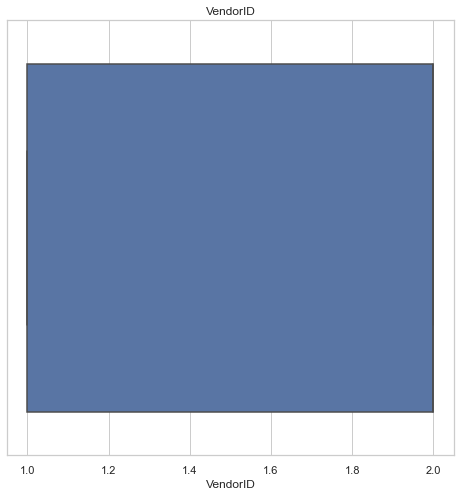

In [27]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["VendorID"])
plt.title(f"VendorID")
plt.show()

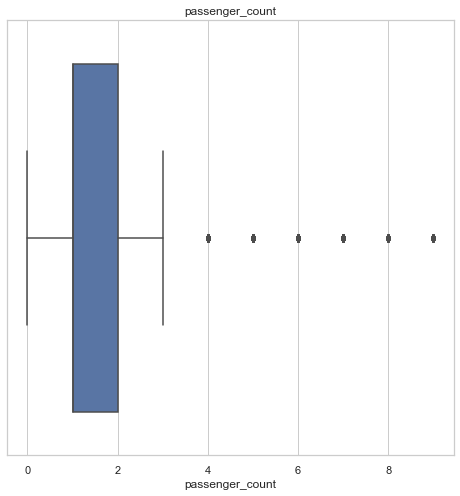

In [28]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["passenger_count"])
plt.title(f"passenger_count")
plt.show()

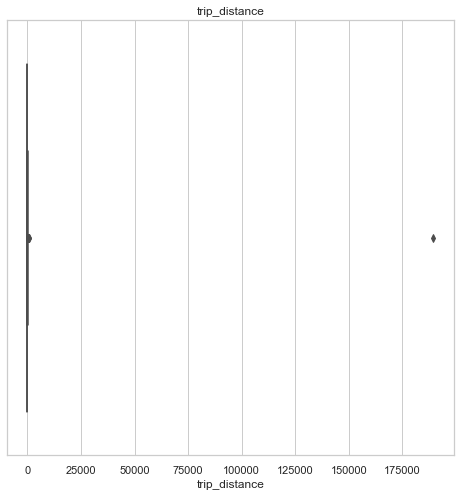

In [29]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["trip_distance"])
plt.title(f"trip_distance")
plt.show()

Valor super alejado en el trip_distance, lo contamos o no para los KPIS?

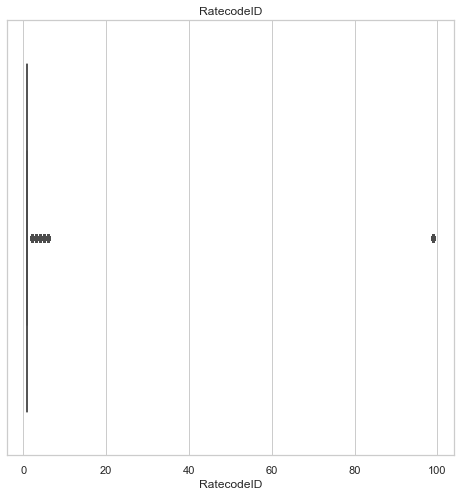

In [30]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["RatecodeID"])
plt.title(f"RatecodeID")
plt.show()

Valor alejado que no corresponde a los datos en el diccionario de datos

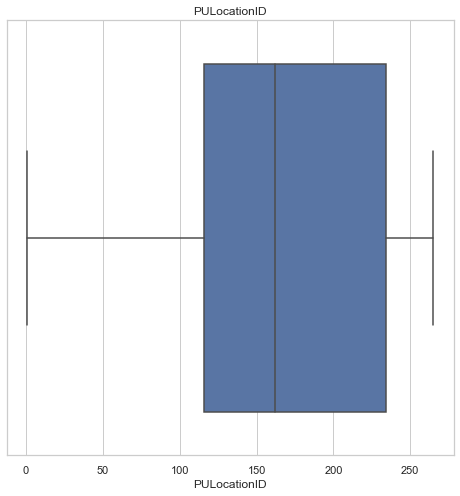

In [31]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["PULocationID"])
plt.title(f"PULocationID")
plt.show()

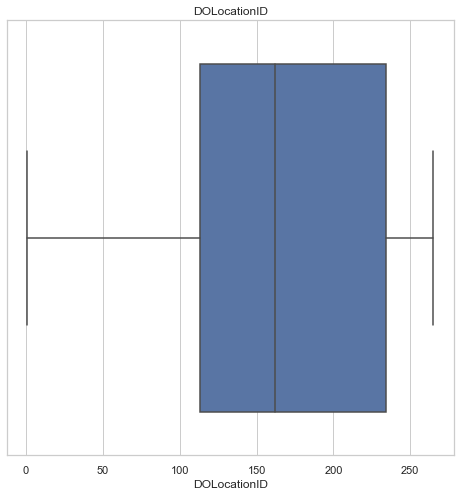

In [32]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["DOLocationID"])
plt.title(f"DOLocationID")
plt.show()	

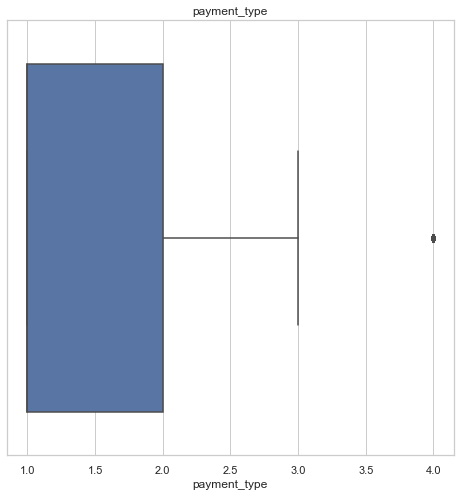

In [33]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["payment_type"])
plt.title(f"payment_type")
plt.show()

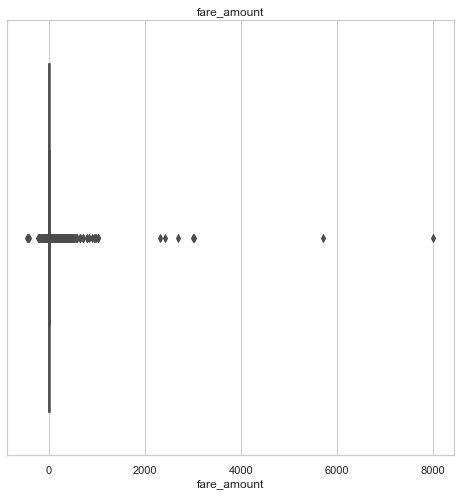

In [34]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["fare_amount"])
plt.title(f"fare_amount")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

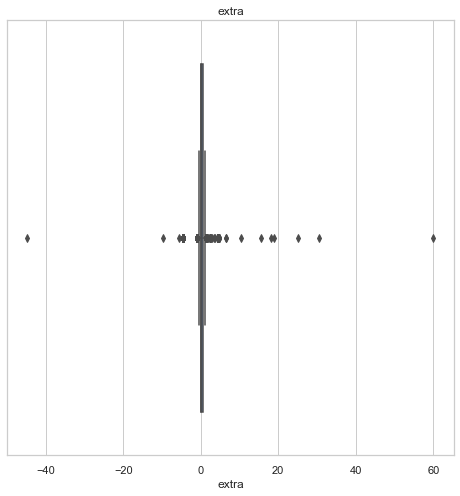

In [35]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["extra"])
plt.title(f"extra")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

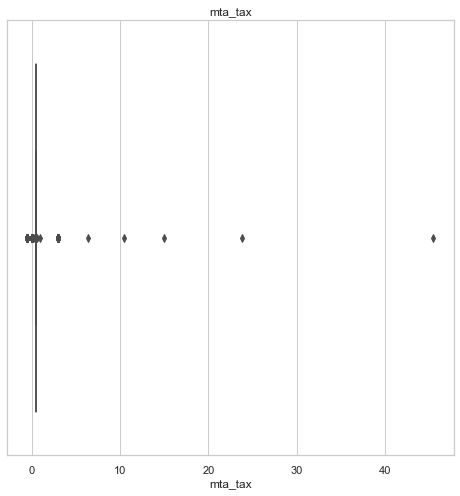

In [36]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["mta_tax"])
plt.title(f"mta_tax")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

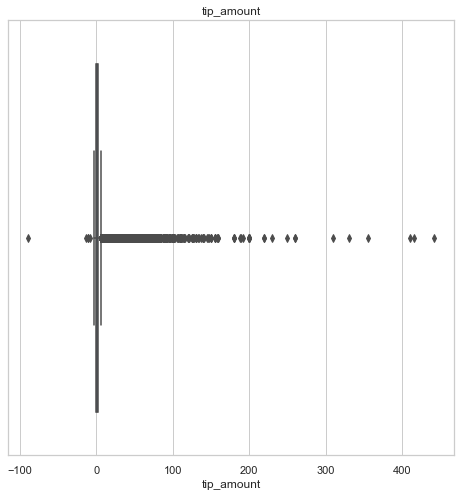

In [37]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["tip_amount"])
plt.title(f"tip_amount")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

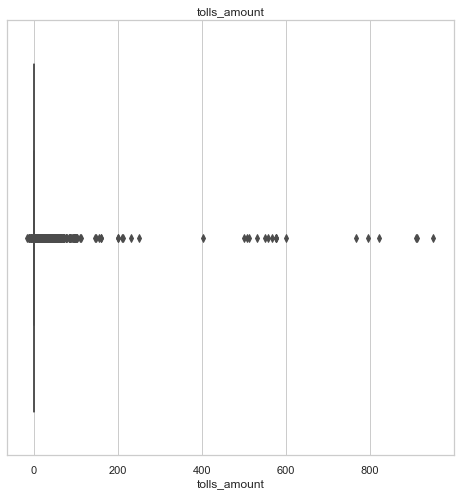

In [38]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["tolls_amount"])
plt.title(f"tolls_amount")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

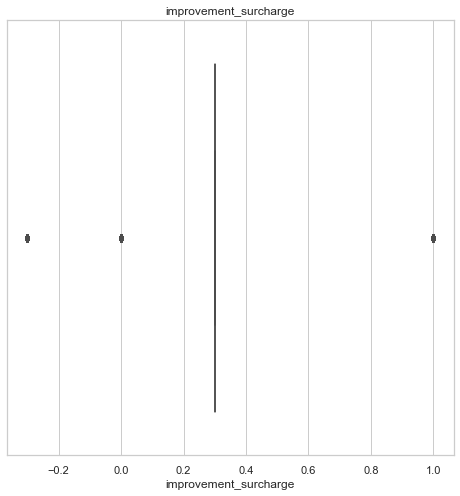

In [39]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["improvement_surcharge"])
plt.title(f"improvement_surcharge")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

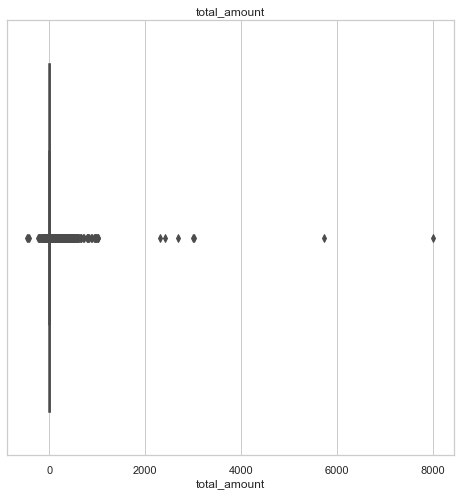

In [40]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["total_amount"])
plt.title(f"total_amount")
plt.show()

Que hacer con los valores negativos y que hace con los outliers.

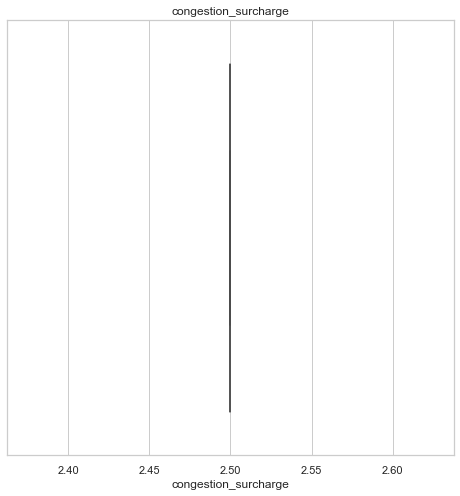

In [41]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["congestion_surcharge"])
plt.title(f"congestion_surcharge")
plt.show()

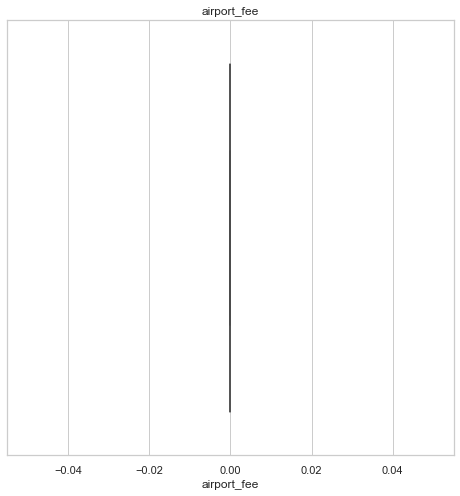

In [42]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["airport_fee"])
plt.title(f"airport_fee")
plt.show()

In [43]:
data["congestion_surcharge"].fillna(0, inplace=True)

In [44]:
data["airport_fee"].fillna(0, inplace=True)

In [45]:
columnas=['VendorID','passenger_count', 'trip_distance', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge','total_amount', 'congestion_surcharge', 'airport_fee']
data[columnas]=data[columnas].abs()

In [46]:
data["Tiempo_Viaje"][data["Tiempo_Viaje"]<timedelta(0)]=timedelta(0)

C:\Users\walter\AppData\Local\Temp\ipykernel_12468\2084004600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tiempo_Viaje"][data["Tiempo_Viaje"]<timedelta(0)]=timedelta(0)


### Valores Alejados

In [47]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0 days 00:03:18
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30,0.0,0.0,0 days 00:18:10
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,0.0,0.0,0 days 00:05:55
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80,0.0,0.0,0 days 00:32:29
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0,0.0,0 days 00:17:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,0.0,0.0,0 days 00:12:45
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,0.0,0.0,0 days 00:03:06
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80,0.0,0.0,0 days 00:09:09
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0 days 00:00:48


In [48]:
data["trip_distance"][data["trip_distance"]>25000]=0

C:\Users\walter\AppData\Local\Temp\ipykernel_12468\2583830549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["trip_distance"][data["trip_distance"]>25000]=0


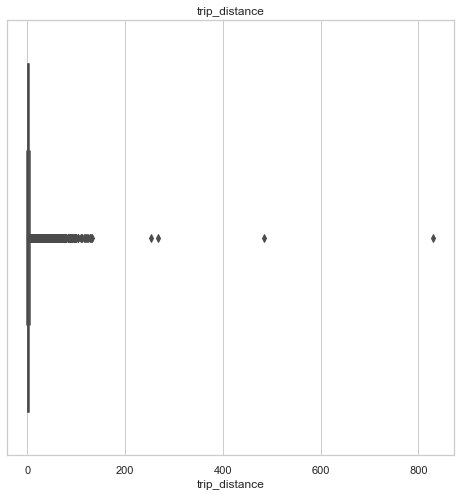

In [49]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["trip_distance"])
plt.title(f"trip_distance")
plt.show()

In [50]:
data["Tiempo_Viaje_s"]=[x.total_seconds() for x in data["Tiempo_Viaje"]]

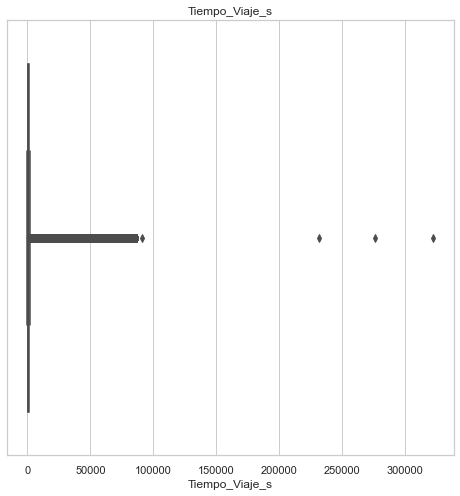

In [51]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["Tiempo_Viaje_s"])
plt.title(f"Tiempo_Viaje_s")
plt.show()

In [52]:
data["Tiempo_Viaje_s"][data["Tiempo_Viaje_s"]>100000]=0

C:\Users\walter\AppData\Local\Temp\ipykernel_12468\965842366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tiempo_Viaje_s"][data["Tiempo_Viaje_s"]>100000]=0


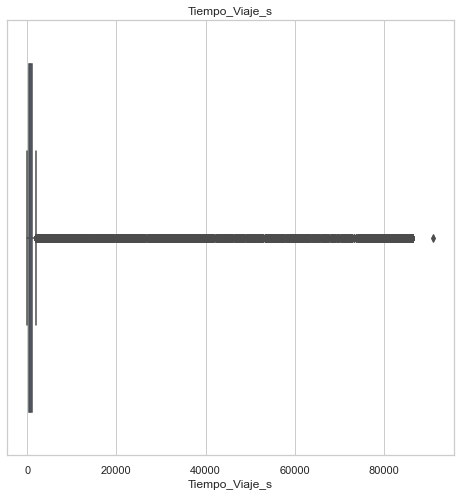

In [53]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["Tiempo_Viaje_s"])
plt.title(f"Tiempo_Viaje_s")
plt.show()

# KPIS

## Tiempo de Viaje

In [54]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje,Tiempo_Viaje_s
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0 days 00:03:18,198.0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,0.0,0.0,0 days 00:18:10,1090.0
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,0.0,0.0,0 days 00:05:55,355.0
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,0.0,0.0,0 days 00:32:29,1949.0
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,0.0,0.0,0 days 00:17:48,1068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8760682,1,2018-01-31 23:21:35,2018-01-31 23:34:20,2,2.80,1,N,158,163,1,...,0.5,0.5,2.65,0.0,0.3,15.95,0.0,0.0,0 days 00:12:45,765.0
8760683,1,2018-01-31 23:35:51,2018-01-31 23:38:57,1,0.60,1,N,163,162,1,...,0.5,0.5,1.15,0.0,0.3,6.95,0.0,0.0,0 days 00:03:06,186.0
8760684,2,2018-01-31 23:28:00,2018-01-31 23:37:09,1,2.95,1,N,74,69,2,...,0.5,0.5,0.00,0.0,0.3,11.80,0.0,0.0,0 days 00:09:09,549.0
8760685,2,2018-01-31 23:24:40,2018-01-31 23:25:28,1,0.00,1,N,7,193,2,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0 days 00:00:48,48.0


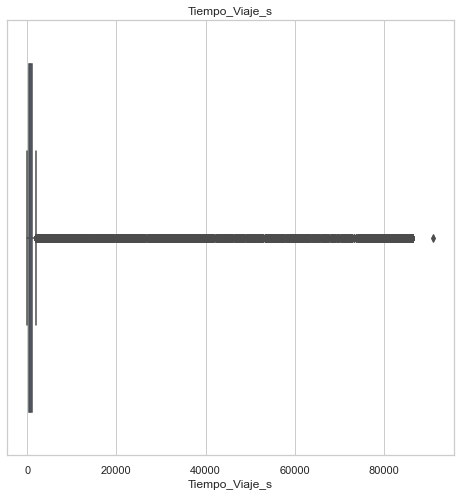

In [55]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data["Tiempo_Viaje_s"])
plt.title(f"Tiempo_Viaje_s")
plt.show()

In [53]:
data_tiempos=data[["tpep_pickup_datetime","tpep_dropoff_datetime","Tiempo_Viaje_s", "trip_distance"]]
data_tiempos

,tpep_pickup_datetime,tpep_dropoff_datetime,Tiempo_Viaje_s,trip_distance
0,2018-01-01 00:21:05,2018-01-01 00:24:23,198.0,0.50
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1090.0,2.70
2,2018-01-01 00:08:26,2018-01-01 00:14:21,355.0,0.80
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1949.0,10.20
4,2018-01-01 00:09:18,2018-01-01 00:27:06,1068.0,2.50
...,...,...,...,...
8760682,2018-01-31 23:21:35,2018-01-31 23:34:20,765.0,2.80
8760683,2018-01-31 23:35:51,2018-01-31 23:38:57,186.0,0.60
8760684,2018-01-31 23:28:00,2018-01-31 23:37:09,549.0,2.95
8760685,2018-01-31 23:24:40,2018-01-31 23:25:28,48.0,0.00


In [54]:
data_tiempos["Velocidad"]=data["trip_distance"]/data["Tiempo_Viaje_s"]

C:\Users\walter\AppData\Local\Temp\ipykernel_12468\978239943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tiempos["Velocidad"]=data["trip_distance"]/data["Tiempo_Viaje_s"]


In [55]:
data_tiempos=data_tiempos[data_tiempos["Tiempo_Viaje_s"]>0.1]

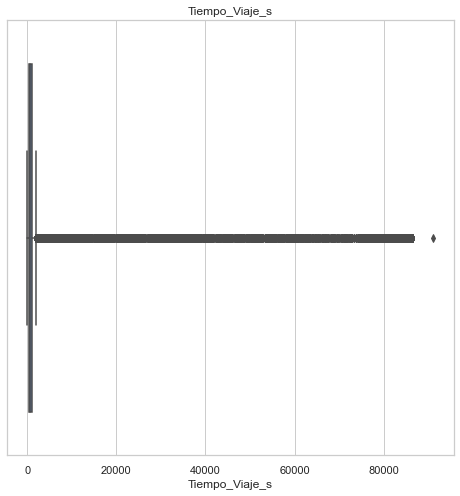

In [59]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data_tiempos["Tiempo_Viaje_s"])
plt.title(f"Tiempo_Viaje_s")
plt.show()

In [56]:
data_tiempos.loc[8237763,"trip_distance"]=0

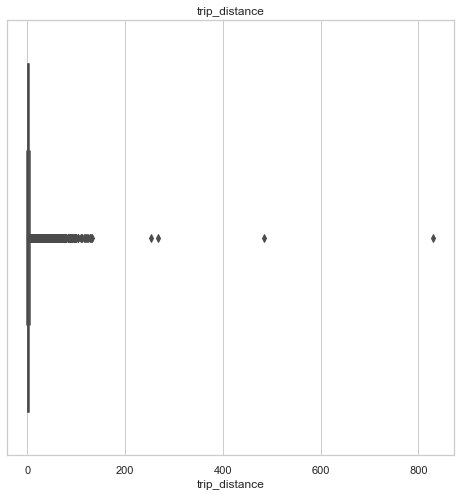

In [61]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.set(style="whitegrid")
sns.boxplot(x =data_tiempos["trip_distance"])
plt.title(f"trip_distance")
plt.show()

In [57]:
df = data_tiempos["trip_distance"]
bins = [-0.1, 1, 2, 7, 15, 900]
data_kpi=pd.cut(df, bins)
data_kpi=pd.DataFrame(data_kpi)
data_kpi.columns=["bins"]
data_kpi=pd.concat([data_tiempos["trip_distance"],data_kpi], axis=1)
data_kpi.groupby("bins").count()
data_kpi=pd.concat([data_tiempos["Tiempo_Viaje_s"],data_kpi], axis=1)

Text(0, 0.5, ' Distancia recorrida en el viaje en Millas ')

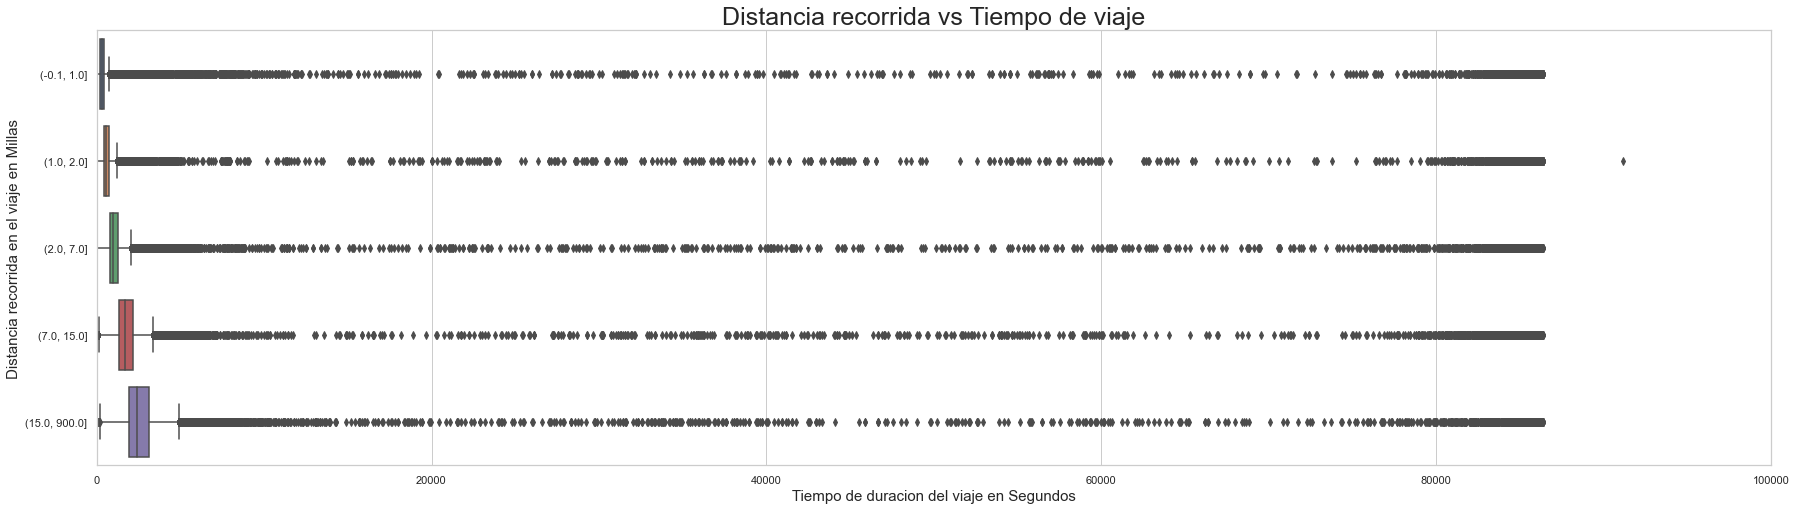

In [63]:
import seaborn
import matplotlib.pyplot as plt
 
sns.set(rc = {'figure.figsize':(30,8)}) 
seaborn.set(style='whitegrid')
seaborn.boxplot(x="Tiempo_Viaje_s", y='bins', data=data_kpi, orient="h")
plt.xlim(0, 100000)
plt.title(" Distancia recorrida vs Tiempo de viaje ",fontsize=25)
plt. xlabel (' Tiempo de duracion del viaje en Segundos ',fontsize=15)
plt. ylabel (' Distancia recorrida en el viaje en Millas ',fontsize=15)


In [64]:
data_kpi.groupby("bins").describe()["Tiempo_Viaje_s"][["count", "mean", "min", "25%", "50%", "75%", "max"]]

,count,mean,min,25%,50%,75%,max
bins,,,,,,,
"(-0.1, 1.0]",2589315.0,432.366505,1.0,207.0,297.0,411.0,86399.0
"(1.0, 2.0]",2876830.0,756.937158,1.0,440.0,571.0,743.0,91190.0
"(2.0, 7.0]",2510309.0,1245.019281,1.0,770.0,994.0,1285.0,86399.0
"(7.0, 15.0]",542027.0,2055.017171,1.0,1325.0,1669.0,2140.0,86395.0
"(15.0, 900.0]",234583.0,2965.911997,1.0,1953.0,2434.0,3140.0,86397.0


In [65]:
data_kpi["Tiempo_Viaje_s"].describe()

count    8.753064e+06
mean     9.404847e+02
std      3.616357e+03
min      1.000000e+00
25%      3.750000e+02
50%      6.230000e+02
75%      1.011000e+03
max      9.119000e+04
Name: Tiempo_Viaje_s, dtype: float64

In [58]:
def outliers(data, columna, valoriqr=1.5):
    Q1=data[columna].describe()[4]
    Q3=data[columna].describe()[6]
    IQR= Q3-Q1
    MIN= Q1-valoriqr*IQR
    MAX= Q3+valoriqr*IQR
    data_sin_outliers=data[(data[columna]<MAX) & (data[columna]>MIN)]
    return data_sin_outliers

In [59]:
data_kpi_SO=outliers(data_kpi, "Tiempo_Viaje_s")

Text(0, 0.5, ' Distancia recorrida en el viaje en Millas ')

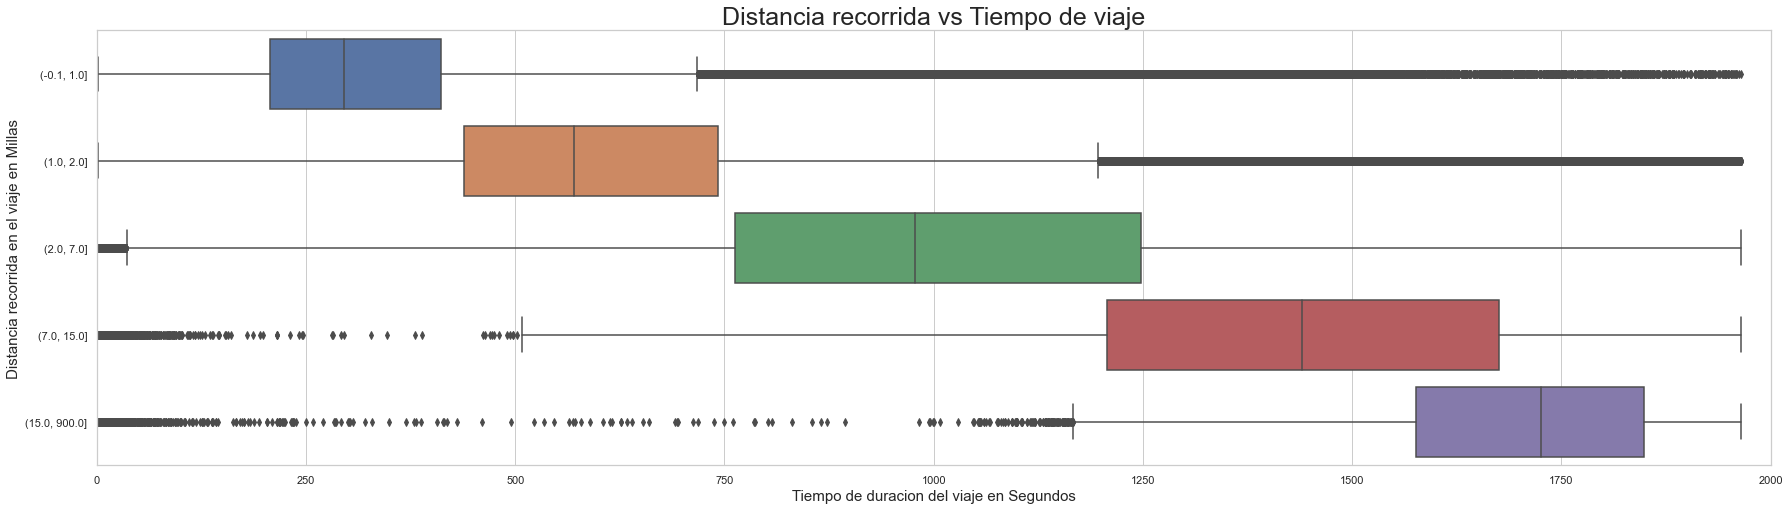

In [68]:
import seaborn
import matplotlib.pyplot as plt
 
sns.set(rc = {'figure.figsize':(30,8)}) 
seaborn.set(style='whitegrid')
seaborn.boxplot(x="Tiempo_Viaje_s", y='bins', data=data_kpi_SO, orient="h")
plt.xlim(0, 2000)
plt.title(" Distancia recorrida vs Tiempo de viaje ",fontsize=25)
plt. xlabel (' Tiempo de duracion del viaje en Segundos ',fontsize=15)
plt. ylabel (' Distancia recorrida en el viaje en Millas ',fontsize=15)


In [69]:
data_kpi_SO.groupby("bins").describe()["Tiempo_Viaje_s"][["count", "mean", "min", "25%", "50%", "75%", "max"]]

,count,mean,min,25%,50%,75%,max
bins,,,,,,,
"(-0.1, 1.0]",2584831.0,327.538050,1.0,207.0,296.0,411.0,1964.0
"(1.0, 2.0]",2869289.0,614.511816,1.0,439.0,570.0,742.0,1964.0
"(2.0, 7.0]",2424942.0,1023.532604,1.0,763.0,978.0,1248.0,1964.0
"(7.0, 15.0]",364108.0,1431.432424,1.0,1207.0,1440.0,1675.0,1964.0
"(15.0, 900.0]",60147.0,1682.002477,1.0,1576.0,1726.0,1849.0,1964.0


## % Rates

In [70]:
data_copy = data.copy()

In [71]:
data_copy = data_copy[data_copy['RatecodeID']!=99]

In [72]:
data_rate = data_copy.groupby('RatecodeID')['fare_amount'].sum() / data['total_amount'].sum() * 100
data_rate

RatecodeID
1    69.947236
2     6.863371
3     0.730220
4     0.251828
5     1.250462
6     0.001299
Name: fare_amount, dtype: float64

In [73]:
fig = px.bar(data_frame=data_rate, x=data_rate.index, y=data_rate.values,
            labels={'y':'Cantidad'}, title='%Rates')
fig.show()

!! mal calculado el %Rates

In [74]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje,Tiempo_Viaje_s
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0 days 00:03:18,198.0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,0.0,0.0,0 days 00:18:10,1090.0
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,0.0,0.0,0 days 00:05:55,355.0
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,0.0,0.0,0 days 00:32:29,1949.0
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,0.0,0.0,0 days 00:17:48,1068.0


In [75]:
data['fare_amount'].unique()

array([ 4.5 , 14.  ,  6.  , ..., 84.08, 49.76, 33.96])

## Viajes inter e intra boroughs

In [60]:
taxi_zone = pd.read_csv('../taxi+_zone_lookup.csv')
taxi_zone.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [61]:
data_zone = data.merge(taxi_zone, left_on='PULocationID', right_on='LocationID')
data_zone.drop(['LocationID','service_zone'], axis=1, inplace=True)
data_zone.rename(columns={"Borough": "PUBorough", "Zone": "PUZone"}, inplace=True)

boroughs_list = ['Manhattan', 'Brooklyn', 'Bronx', 'Queens', 'Staten Island']
data_zone = data_zone[data_zone['PUBorough'].isin(boroughs_list)]

data_zone = data_zone.merge(taxi_zone, left_on='DOLocationID', right_on='LocationID')
data_zone.drop(['LocationID','service_zone'], axis=1, inplace=True)
data_zone.rename(columns={"Borough": "DOBorough", "Zone": "DOZone"}, inplace=True)

In [62]:
data_zone['Tipo_Viaje'] = (data_zone['PUBorough'] == data_zone['DOBorough']).map({True: 'Intra', False: 'Inter'})  

In [63]:
df_data_zone = pd.DataFrame(data_zone.groupby('PUBorough')['Tipo_Viaje'].value_counts())
df_data_zone.rename(columns={'Tipo_Viaje':'Cantidad'}, inplace=True)
df_data_zone.reset_index(level=1, inplace=True)
df_data_zone

,Tipo_Viaje,Cantidad
PUBorough,,
Bronx,Intra,5123
Bronx,Inter,2266
Brooklyn,Intra,67286
Brooklyn,Inter,32971
Manhattan,Intra,7437887
Manhattan,Inter,528567
Queens,Inter,388209
Queens,Intra,138752
Staten Island,Intra,124


In [80]:
fig = px.bar(df_data_zone, x=df_data_zone.index, y='Cantidad',
                    color='Tipo_Viaje', barmode='group', height=400,
                    title='Viajes intra e inter')
fig.update_yaxes(range = [0,1000000])
fig.show()

## Cantidad de viajes por Borough

In [81]:
data_zone_trips = data_zone.groupby('PUBorough')['PUBorough'].count().sort_values(ascending=False)
data_zone_trips

PUBorough
Manhattan        7966454
Queens            526961
Brooklyn          100257
Bronx               7389
Staten Island        144
Name: PUBorough, dtype: int64

In [82]:
fig = px.bar(data_zone_trips, x=data_zone_trips.index, y=data_zone_trips.values,
            labels={'index':'Boroughs', 'y':'Cantidad'}, title='Cantiad de viajes por boroughs')
fig.show()

## % payments types

In [83]:
data_payment_type = pd.DataFrame(data.groupby('payment_type')['payment_type'].count() / data.shape[0] * 100)
data_payment_type.columns = ['Porcentaje']
data_payment_type.index = ['Credit card', 'Cash', 'No charge', 'Dispute']
data_payment_type

,Porcentaje
Credit card,69.702479
Cash,29.669077
No charge,0.493158
Dispute,0.135286


In [84]:
fig = px.bar(data_payment_type, x=data_payment_type.index, y='Porcentaje',
            labels={'index':'Tipo de pago'}, title='Tipo de pago')
fig.show()

## Avg tips por passanger

In [85]:
data_tips = data.copy()

In [86]:
data_tips = data_tips[data_tips['payment_type']==1] # This field is auto populates for credit card tips

In [87]:
data_tips_avg = data_tips.groupby('passenger_count')['tip_amount'].mean()
data_tips_avg

passenger_count
0    2.526462
1    2.594945
2    2.672118
3    2.626880
4    2.634746
5    2.623102
6    2.614232
7    7.474848
8    4.968182
9    6.566364
Name: tip_amount, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='tip_amount'>

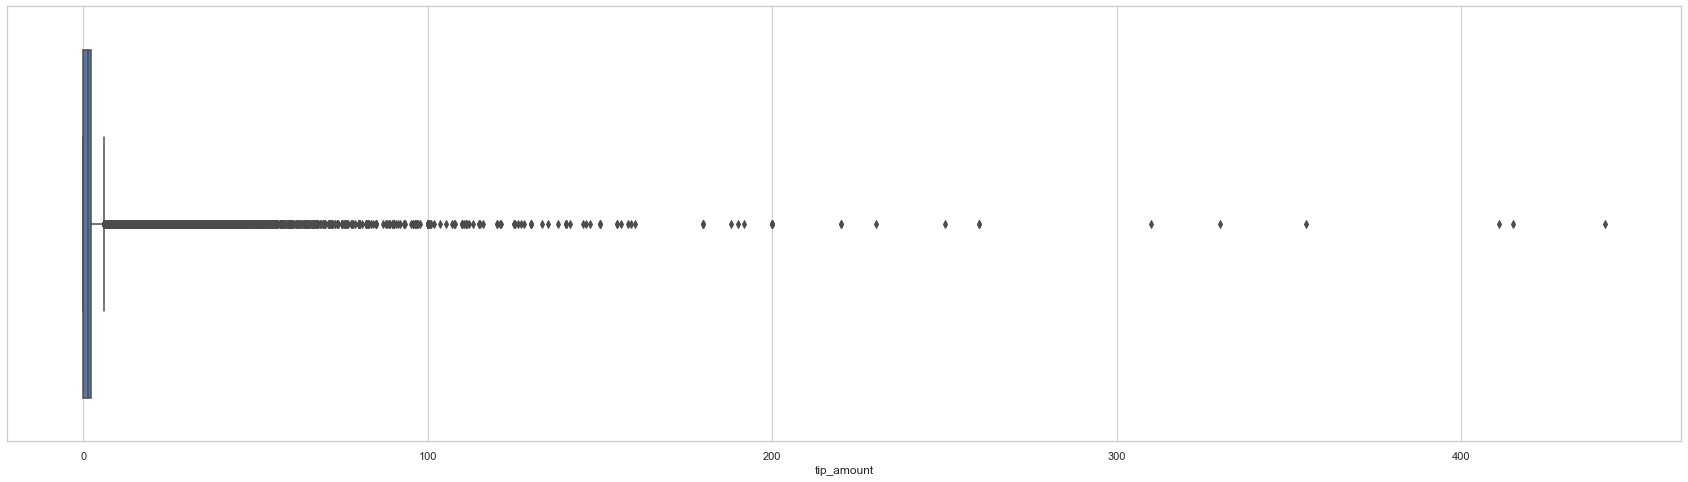

In [88]:
sns.boxplot(data_copy['tip_amount'])

In [89]:
bins = [0, 5, 10, 20, 50, 100, 450]
data_bins = pd.DataFrame(pd.cut(data_tips['tip_amount'], bins))
data_bins.columns = ['bins']
data_tip_bins = data_tips.merge(data_bins, left_on=data_tips.index, right_on=data_bins.index)
data_tip_bins = data_tip_bins.groupby('bins')['tip_amount'].count() 
data_tip_bins = data_tip_bins.reset_index()
data_tip_bins['bins'] = data_tip_bins['bins'].values.astype('string')
data_tip_bins

,bins,tip_amount
0,"(0, 5]",5295352
1,"(5, 10]",409264
2,"(10, 20]",153691
3,"(20, 50]",5752
4,"(50, 100]",473
5,"(100, 450]",82


In [90]:
fig = px.bar(data_tip_bins, x='bins', y='tip_amount',
            labels={'bins':'Rangos de tip', 'tip_amount':'Cantidad'}, title='Rangos de tip_amount')
fig.show()

## Otros KIP's
Agregar el codigo desde aqui abajo, nombrarlo con el titulo con 2 # y utilzar el dataset "data" obtener los datos, pero no le hagan modificaciones a ese

## Barrios con mayor participación


In [207]:
gby_zone_borough=data_zone.groupby(['PUZone','PUBorough'])
data_zone_counts=gby_zone_borough['PUZone'].count().sort_values(ascending=False).rename("count")
data_zone_counts=data_zone_counts.reset_index()
data_zone_counts

,PUZone,PUBorough,count
0,Upper East Side South,Manhattan,361012
1,Midtown Center,Manhattan,354958
2,Upper East Side North,Manhattan,345712
3,Times Sq/Theatre District,Manhattan,309228
4,Midtown East,Manhattan,308339
...,...,...,...
250,Rikers Island,Bronx,2
251,Arden Heights,Staten Island,2
252,Rossville/Woodrow,Staten Island,1
253,Charleston/Tottenville,Staten Island,1


las 20 zonas con más participacion

In [211]:
fig = px.bar(data_zone_counts[0:20], x='PUZone', y='count',color="PUBorough",
            labels={'count':'Cantidad de Viajes', 'PUZone':'Zona'}, title='Cantidad de viajes por Zona')
fig.show()

In [210]:
fig = px.sunburst(
    data_zone_counts[0:20],
    path=["PUBorough","PUZone"],
    values='count',
)
fig.show()

## Días de la semana con más viajes

In [218]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Tiempo_Viaje,Tiempo_Viaje_s
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,...,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0,0 days 00:03:18,198.0
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,...,0.5,0.5,0.00,0.0,0.3,15.30,0.0,0.0,0 days 00:18:10,1090.0
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,...,0.5,0.5,1.00,0.0,0.3,8.30,0.0,0.0,0 days 00:05:55,355.0
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,...,0.5,0.5,0.00,0.0,0.3,34.80,0.0,0.0,0 days 00:32:29,1949.0
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,...,0.5,0.5,2.75,0.0,0.3,16.55,0.0,0.0,0 days 00:17:48,1068.0


In [259]:
dayofweek=data["tpep_pickup_datetime"].dt.dayofweek.rename("Day")
gby_dayofweek=data.groupby(dayofweek)

In [274]:
dayofweek_counts=gby_dayofweek["trip_distance"].count().rename("trips_count").sort_values(ascending=False)
dayofweek_counts=dayofweek_counts.reset_index()
dayofweek_counts["Day_name"]=dayofweek_counts["Day"].map({0:"Lunes",1:"Martes",2:"Miercoles",3:"Jueves",4:"Viernes",5:"Sabado",6:"Domingo"})

In [279]:
fig = px.bar(dayofweek_counts,x="Day_name",y="trips_count",
            labels={'Day_name':'Día', 'trips_count':'Cantidad de viajes'}, title='Cantidad de viajes por Día de la semana')
fig.show()